## Quantum Illumination Experiment 2

__Find the optimal configurations for PCS state (coherent superpostion of photon subtraction and addition).__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configuration
from IPython.display import set_matplotlib_formats
plt.style.use(['seaborn-whitegrid', '14pt'])
set_matplotlib_formats('pdf', 'png')
np.set_printoptions(threshold='nan', precision=6, suppress=True)
%matplotlib inline

In [2]:
df1 = pd.read_csv('../output/expr_2_pcs_nth_0.1_grid_101_09-19.csv', comment='#')
df2 = pd.read_csv('../output/expr_2_pcs_nth_1_grid_26_09-22.csv', comment='#')

In [3]:
df1.head()

,Nth,R,State,lambda,ra,rb,Aver_N,A_N,B_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s
0,0.1,0.01,PCS,0.099504,0.0,0.00,0.079608,0.039804,0.039804,0.168732,0.490605,0.499839,0.500273
1,0.1,0.01,PCS,0.099504,0.0,0.01,0.080000,0.039802,0.040198,0.168725,0.490595,0.499838,0.500273
2,0.1,0.01,PCS,0.099504,0.0,0.02,0.081176,0.039796,0.041380,0.168702,0.490565,0.499837,0.500273
3,0.1,0.01,PCS,0.099504,0.0,0.03,0.083134,0.039786,0.043348,0.168665,0.490517,0.499836,0.500273
4,0.1,0.01,PCS,0.099504,0.0,0.04,0.085873,0.039773,0.046100,0.168612,0.490451,0.499834,0.500215


In [4]:
df2.head()

,Nth,R,State,lambda,ra,rb,Aver_N,A_aver_N,B_aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s
0,1,0.01,PCS,0.099504,0.0,0.00,0.079608,0.039804,0.039804,0.168732,0.493447,0.499923,0.500215
1,1,0.01,PCS,0.099504,0.0,0.04,0.085873,0.039773,0.046100,0.168612,0.493421,0.499922,0.500156
2,1,0.01,PCS,0.099504,0.0,0.08,0.104552,0.039680,0.064871,0.168255,0.493341,0.499919,0.500156
3,1,0.01,PCS,0.099504,0.0,0.12,0.135298,0.039528,0.095770,0.167669,0.493214,0.499915,0.500098
4,1,0.01,PCS,0.099504,0.0,0.16,0.177552,0.039319,0.138233,0.166866,0.493043,0.499908,0.500039


In [5]:
def plot_heatmap(hb, cb, vn, n, na, nb):
    fig, axes = plt.subplots(3, 2, figsize=(12, 16))

    ax1 = axes[0, 0]
    sns.heatmap(hb, cmap="RdBu_r", xticklabels=False, yticklabels=False, ax=ax1)
    ax1.set_title("Helstrom Bound")

    ax2 = axes[0, 1]
    sns.heatmap(cb, cmap="RdBu_r", xticklabels=False, yticklabels=False, ax=ax2)
    ax2.set_title("Chernoff Bound")

    ax3 = axes[1, 0]
    sns.heatmap(vn, cmap="RdBu_r", xticklabels=False, yticklabels=False, ax=ax3)
    ax3.set_title("VN Entropy")

    ax4 = axes[1, 1]
    sns.heatmap(n, cmap="RdBu_r", xticklabels=False, yticklabels=False, ax=ax4)
    ax4.set_title("Average Photon Numebrs")

    ax5 = axes[2, 0]
    sns.heatmap(na, cmap="RdBu_r", xticklabels=False, yticklabels=False, ax=ax5)
    ax5.set_title("Average Photon of Branch A")

    ax6 = axes[2, 1]
    sns.heatmap(nb, cmap="RdBu_r", xticklabels=False, yticklabels=False, ax=ax6)
    ax6.set_title("Average Photon of Branch B")

    plt.show()

### Nth = 0.1

In [6]:
hb1 = df1['Helstrom_Bound'].values.reshape(101, 101)
cb1 = df1['Chernoff_Bound'].values.reshape(101, 101)
n1 = df1['Aver_N'].values.reshape(101, 101)
vn1 = df1['VN_Entropy'].values.reshape(101, 101)
na1 = df1['A_N'].values.reshape(101, 101)
nb1 = df1['B_N'].values.reshape(101, 101)

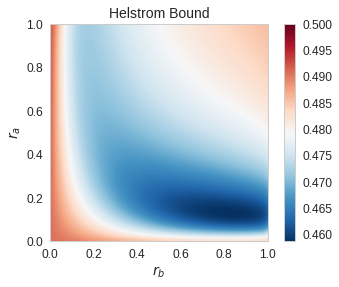

In [7]:
plt.imshow(hb1, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Helstrom Bound')
plt.savefig('../output/g_pcs_qhb_01.pdf', bbox_inches='tight')

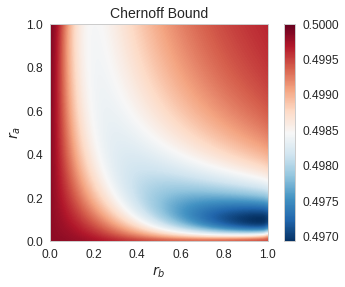

In [8]:
plt.imshow(cb1, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Chernoff Bound')
plt.savefig('../output/g_pcs_qcb_01.pdf', bbox_inches='tight')

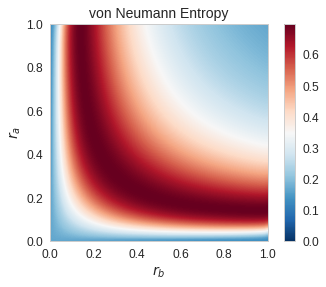

In [9]:
plt.imshow(vn1, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('von Neumann Entropy')
plt.savefig('../output/g_pcs_vn_01.pdf', bbox_inches='tight')

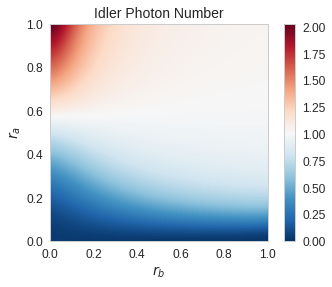

In [10]:
plt.imshow(na1, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Idler Photon Number')
plt.savefig('../output/g_pcs_na_01.pdf', bbox_inches='tight')

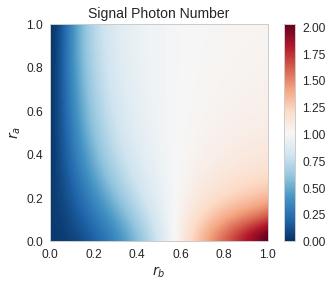

In [11]:
plt.imshow(nb1, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Signal Photon Number')
plt.savefig('../output/g_pcs_nb_01.pdf', bbox_inches='tight')

### Nth = 1.0

In [12]:
size = 26
hb2 = df2['Helstrom_Bound'].values.reshape(size, size)
cb2 = df2['Chernoff_Bound'].values.reshape(size, size)
n2 = df2['Aver_N'].values.reshape(size, size)
vn2 = df2['VN_Entropy'].values.reshape(size, size)
na2 = df2['A_aver_N'].values.reshape(size, size)
nb2 = df2['B_aver_N'].values.reshape(size, size)

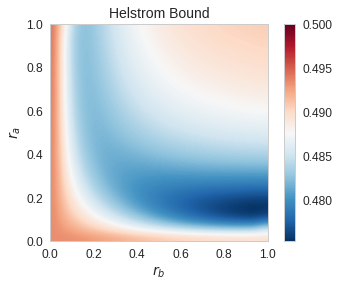

In [13]:
plt.imshow(hb2, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Helstrom Bound')
plt.savefig('../output/g_pcs_qhb_1.pdf', bbox_inches='tight')

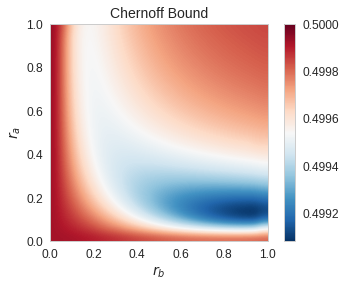

In [14]:
plt.imshow(cb2, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Chernoff Bound')
plt.savefig('../output/g_pcs_qcb_1.pdf', bbox_inches='tight')

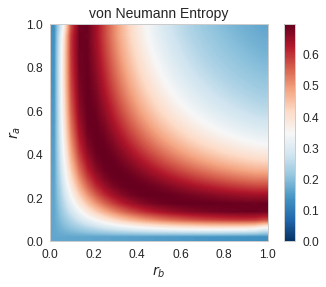

In [15]:
plt.imshow(vn2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('von Neumann Entropy')
plt.savefig('../output/g_pcs_vn_1.pdf', bbox_inches='tight')

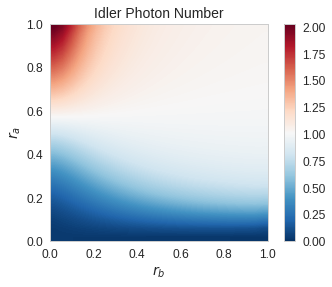

In [16]:
plt.imshow(na2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Idler Photon Number')
plt.savefig('../output/g_pcs_na_1.pdf', bbox_inches='tight')

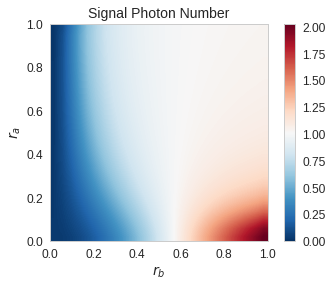

In [17]:
plt.imshow(nb2, vmin=0, cmap='RdBu_r', interpolation='Bilinear', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Signal Photon Number')
plt.savefig('../output/g_pcs_nb_1.pdf', bbox_inches='tight')